In [1]:
from matplotlib.colors import ListedColormap
from sklearn import datasets, metrics, tree 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

import sklearn
import numpy as np
import pandas as pd
import pandas
import seaborn
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score
%matplotlib inline

In [3]:
#第一列代表真实的生物反应，有反应(1),无反应(0)。第2列到第1777列代表分子的属性，例如，大小、形状或元素等。
data= pd.read_csv('bioresponse.csv', header=0, sep=',')

In [4]:
data.shape

(3751, 1777)

In [5]:
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.describe()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#y=data['Activity']
#x=data.drop('Activity', axis=1)
y = data.Activity.values
x=data.iloc[:, 1:]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, random_state=1, test_size=0.3)

In [8]:
data.columns

Index(['Activity', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9',
       ...
       'D1767', 'D1768', 'D1769', 'D1770', 'D1771', 'D1772', 'D1773', 'D1774',
       'D1775', 'D1776'],
      dtype='object', length=1777)

In [9]:
def scatter(actual, predicted, T):
    plt.scatter(actual, predicted)
    plt.xlabel("Labels")
    plt.ylabel("Predicted probabilities")
    plt.plot([-0.2, 1.2], [T, T])
    plt.axis([-0.1, 1.1, -0.1, 1.1])
def many_scatters(actuals, predicteds, Ts, titles, shape):
    plt.figure(figsize=(shape[1]*5, shape[0]*5))
    i = 1
    for actual, predicted, T, title in zip(actuals, predicteds, Ts, titles):
        ax = plt.subplot(shape[0], shape[1], i)
        ax.set_title(title)
        i += 1
        scatter(actual, predicted, T)

<font face="微软雅黑" size=2 color=blue > 1.DecisionTree

In [10]:
model_tree = tree.DecisionTreeClassifier(random_state=1)
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [11]:
#其中average参数有五种：(None, ‘micro’, ‘macro’, ‘weighted’, ‘samples’)
#defualt
predictions = model_tree.predict(x_test)
print('accuracy:{:.3f}'.format(metrics.accuracy_score(y_test,predictions)))
print('precision:{:.3f}'.format(metrics.precision_score(y_test, model_tree.predict(x_test), average='macro')))
print('recall:{:.3f}'.format(metrics.recall_score(y_test, model_tree.predict(x_test), average='micro')))
print('f1:{:.3f}'.format(metrics.f1_score(y_test,model_tree.predict(x_test), average='weighted')))
print('log-loss:{:.3f}'.format(metrics.log_loss(y_test, model_tree.predict(x_test))))

accuracy:0.701
precision:0.698
recall:0.701
f1:0.701
log-loss:10.337


In [12]:
predictions

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [11]:
estimator = tree.DecisionTreeClassifier(random_state = 1, max_depth = 5)
estimator.fit(x_train, y_train)
print(metrics.accuracy_score(y_train, estimator.predict(x_train)))
print('*'* 40)
print('accuracy:{:.3f}'.format(metrics.accuracy_score(y_test,estimator.predict(x_test))))
print('precision:{:.3f}'.format(metrics.precision_score(y_test, estimator.predict(x_test), average='macro')))
print('recall:{:.3f}'.format(metrics.recall_score(y_test, estimator.predict(x_test), average='micro')))
print('f1:{:.3f}'.format(metrics.f1_score(y_test,estimator.predict(x_test), average='weighted')))
print('log-loss:{:.3f}'.format(metrics.log_loss(y_test, estimator.predict(x_test))))

0.8148571428571428
****************************************
accuracy:0.778
precision:0.776
recall:0.778
f1:0.778
log-loss:7.669


In [12]:
#shallow decision tree:
estimator1 = tree.DecisionTreeClassifier(random_state = 1, max_depth = 5, min_samples_leaf = 5)
estimator1.fit(x_train, y_train)
pre1=estimator1.predict(x_test)
print(metrics.accuracy_score(y_train, estimator1.predict(x_train)))
print('*'* 40)
print('accuracy:{:.3f}'.format(metrics.accuracy_score(y_test,estimator1.predict(x_test))))
print('precision:{:.3f}'.format(metrics.precision_score(y_test, estimator1.predict(x_test), average='macro')))
print('recall:{:.3f}'.format(metrics.recall_score(y_test, estimator1.predict(x_test), average='micro')))
print('f1:{:.3f}'.format(metrics.f1_score(y_test,estimator1.predict(x_test), average='weighted')))
print('log-loss:{:.3f}'.format(metrics.log_loss(y_test, estimator1.predict(x_test))))

0.8125714285714286
****************************************
accuracy:0.782
precision:0.780
recall:0.782
f1:0.782
log-loss:7.515


In [13]:
#deep decision tree:
estimator2 = tree.DecisionTreeClassifier(random_state = 1, max_depth = 10, min_samples_leaf = 5)
estimator2.fit(x_train, y_train)
pre2=estimator2.predict(x_test)
print(metrics.accuracy_score(y_train, estimator2.predict(x_train)))
print('*'* 40)
print('accuracy:{:.3f}'.format(metrics.accuracy_score(y_test,estimator2.predict(x_test))))
print('precision:{:.3f}'.format(metrics.precision_score(y_test, estimator2.predict(x_test), average='macro')))
print('recall:{:.3f}'.format(metrics.recall_score(y_test, estimator2.predict(x_test), average='micro')))
print('f1:{:.3f}'.format(metrics.f1_score(y_test,estimator2.predict(x_test), average='weighted')))
print('log-loss:{:.3f}'.format(metrics.log_loss(y_test, estimator2.predict(x_test))))

0.8548571428571429
****************************************
accuracy:0.765
precision:0.762
recall:0.765
f1:0.765
log-loss:8.129


<font face="微软雅黑" size=2 color=blue > 2.RandomForest

In [14]:
from sklearn.model_selection import learning_curve
from sklearn import ensemble

In [15]:
#Learning curves for shallow trees
#random forest on shallow trees
estimator3= ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)
estimator3.fit(x_train, y_train)
pre3=estimator3.predict(x_test)

In [16]:
train_sizes, train_scores, test_scores = learning_curve(estimator3, x, y, train_sizes=np.arange(0.1,1., 0.2), cv=3, scoring='accuracy')

Populating the interactive namespace from numpy and matplotlib


D:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['scatter']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


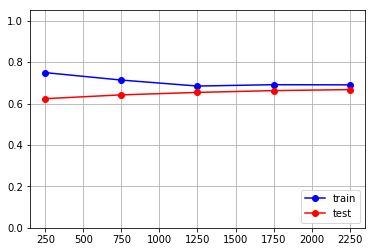

In [17]:
%pylab inline
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'b-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

In [18]:
# increase the depth
estimator4 = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 8, random_state = 1)
estimator4.fit(x_train, y_train)
pre4=estimator4.predict(x_test)

In [19]:
train_sizes, train_scores, test_scores = learning_curve(estimator4, x, y, 
                                                                       train_sizes=np.arange(0.1,1, 0.2), 
                                                                       cv=3, scoring='accuracy')

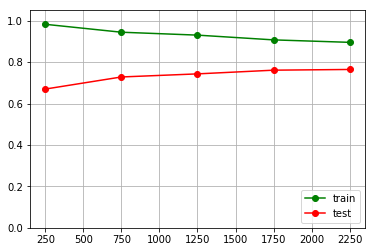

In [20]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

In [44]:
print ("Metrics:")
print ()
for actual, predicted, descr in zip([y_test, y_test, y_test, y_test], 
                                    [pre1 , pre2 , pre3  , pre4 ],
                                    ["Shallow decision tree:", "Deep decision tree:", " Random forest on shallow trees"," Random forest on deep trees"]):
    print (descr, "precision =", metrics.precision_score(actual, predicted),";","recall =", \
        metrics.recall_score(actual, predicted), ";",\
        "accuracy =", metrics.accuracy_score(actual, predicted), ";",\
           "F1-score=",metrics.f1_score(actual, predicted),";","Log-loss=",metrics.log_loss(actual, predicted))

Metrics:

Shallow decision tree: precision = 0.8045234248788369 ; recall = 0.8006430868167203 ; accuracy = 0.7824156305506217 ; F1-score= 0.8025785656728446 ; Log-loss= 7.515183808207966
Deep decision tree: precision = 0.7883683360258481 ; recall = 0.7845659163987139 ; accuracy = 0.7646536412078153 ; F1-score= 0.7864625302175665 ; Log-loss= 8.12866828766846
 Random forest on shallow trees precision = 0.6931506849315069 ; recall = 0.8135048231511254 ; accuracy = 0.6980461811722913 ; F1-score= 0.7485207100591715 ; Log-loss= 10.42927449741918
 Random forest on deep trees precision = 0.8119800332778702 ; recall = 0.7845659163987139 ; accuracy = 0.7806394316163411 ; F1-score= 0.7980376124284546 ; Log-loss= 7.576525865055551


In [45]:
from sklearn.metrics import precision_recall_curve

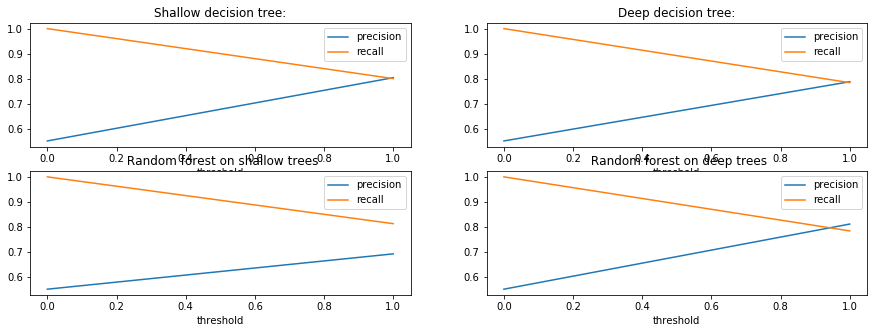

In [48]:
precs = []
recs = []
threshs = []
labels = ["Shallow decision tree:", "Deep decision tree:", " Random forest on shallow trees"," Random forest on deep trees"]
for actual, predicted in zip([y_test, y_test, y_test, y_test], 
                                    [pre1 , pre2 , pre3  , pre4 ]):
    prec, rec, thresh = precision_recall_curve(actual, predicted)
    precs.append(prec)
    recs.append(rec)
    threshs.append(thresh)
plt.figure(figsize=(15, 5))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    plt.plot(threshs[i], precs[i][:-1], label="precision")
    plt.plot(threshs[i], recs[i][:-1], label="recall")
    plt.xlabel("threshold")
    ax.set_title(labels[i])
    plt.legend()

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score

[-0.1, 1.1, -0.1, 1.1]

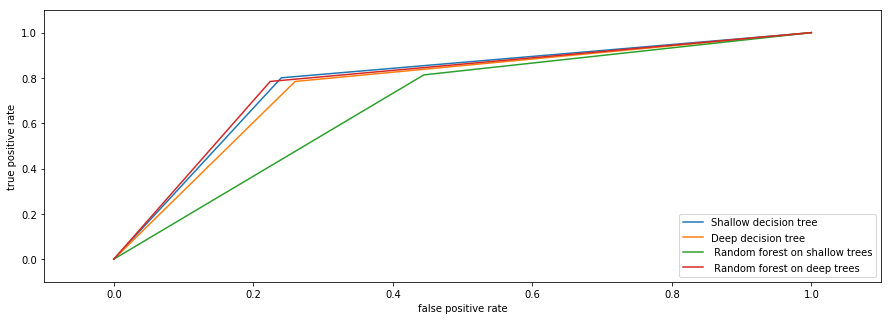

In [51]:
plt.figure(figsize=(15, 5))
aucs = ""
for actual, predicted, descr in zip([y_test, y_test, y_test, y_test], 
                                    [pre1 , pre2 , pre3  , pre4 ],
                                    ["Shallow decision tree", "Deep decision tree", " Random forest on shallow trees"," Random forest on deep trees"]):
    fpr, tpr, thr = roc_curve(actual, predicted)
    plt.plot(fpr, tpr, label=descr)
    aucs += descr + ":%3f"%roc_auc_score(actual, predicted) + " "
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=4)
plt.axis([-0.1, 1.1, -0.1, 1.1])